
# Used Libraries and Models
<hr>

All the used **libraries** are as follows:
- Numpy
- Pandas
- Scikit Learn
- Matplotlib and seaborn

Models used to make predictions are:
- K Neighbors Classifier
- Decision Tree Classifier


In [ ]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 8.1 MB/s eta 0:00:00m eta 0:00:010:0101
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 KB 6.8 MB/s eta 0:00:000:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 7.3 MB/s eta 0:00:00m eta 0:00:010:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 890.9 kB/s eta 0:00:001m914.6 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Importing the Dataset
<hr>

Dataset is imported with the **pandas** library.

In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/msaadrashad/datasets/main/heart.csv'
data = pd.read_csv(url)
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# Data Information
<hr>

Now, Let's take a information of this Dataset. The Dataset contains total of 918 rows and total of 12 columns with **1 Output column** and **11 features** columns.

The Dataset has following **features**:
- Age (years)
- Gender (Male or Female)
- Different types of Chest Pain
- Resting Blood Pressure (Simply measure of High BP)
- Cholesterol Level
- Fasing BS level (Blood Sugar)
- Resting ECG (electrocardiography)
- Maximum value of HR (Heart Rate)
- Exercise Angina (Person is active in sports and exercise or not)
- Oldpeak (Don't know what's this)
- ST slop value (segment/heart rate slope)

**HeartDisease** is our target variable.<br>
Show the Information about dataset below:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Now, we count total number of classes in the dataset with `value_counts()`

1    508
0    410
Name: HeartDisease, dtype: int64


We can visualize the Correlation of the features with **seaborn heatmap**.

<AxesSubplot:>

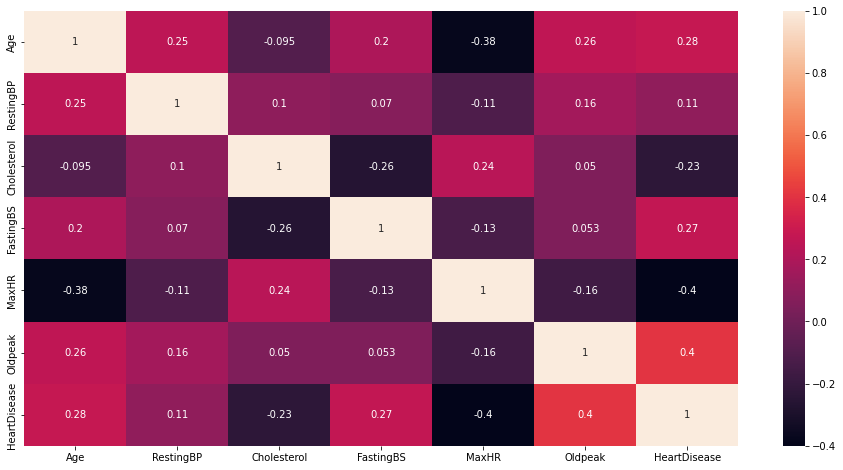

# Null Values and Encoding
<hr>

Now, we find the **null values** in the dataset (None found) and the **Encode** the Categorical values with [Label Encoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) to convert it into **Numerical values**.
<br>

The following features are Encoded.
- Sex
- ChestPainType
- RestingECG
- ExerciseAngina
- ST_Slope

These features are converted into numerical values (0,1,2,..) accordingly.

## Null Values
Show the Null values.

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
913,False,False,False,False,False,False,False,False,False,False,False,False
914,False,False,False,False,False,False,False,False,False,False,False,False
915,False,False,False,False,False,False,False,False,False,False,False,False
916,False,False,False,False,False,False,False,False,False,False,False,False


0

## Encoding

Now, let's take a look at dataset after encoding it.

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


# Removing Target variable from dataset
<hr>

Now, we drop the Target column `HeartDisease` from dataset and assign it to **variable X** and assign the values of `HeartDisease` to **variable y**.

In [ ]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1
914,68,1,0,144,193,1,1,141,0,3.4,1
915,57,1,0,130,131,0,1,115,1,1.2,1
916,57,0,1,130,236,0,0,174,0,0.0,1


In [ ]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

# Spliting Dataset into train and test
<hr>

Now, we split the X and y variables into training and testing dataset with `train_test_split`, test size is 20% and random state (How random dataset is splitted) is 42.

Display X train Values

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
795,42,1,2,120,240,1,1,194,0,0.8,0
25,36,1,2,130,209,0,1,178,0,0.0,2
84,56,1,0,150,213,1,1,125,1,1.0,1
10,37,0,2,130,211,0,1,142,0,0.0,2
344,51,1,0,120,0,1,1,104,0,0.0,1


Display X test Values

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
668,63,0,1,140,195,0,1,179,0,0.0,2
30,53,1,2,145,518,0,1,130,0,0.0,1
377,65,1,0,160,0,1,2,122,0,1.2,1
535,56,1,0,130,0,0,0,122,1,1.0,1
807,54,1,1,108,309,0,1,156,0,0.0,2


# KNN Model and Predictions
<hr>

KNN model is implemented with the `KNeighborsClassifier` imported from **sklearn.neighbors** and we fit the X_train, y_train data into it and make predictions on X_test data we will get the predictions in the **numpy array**.

KNeighborsClassifier(n_neighbors=31)

array([0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1])

# Decision Tree Model and Predictions
<hr>

Decision tree  model is implemented with the `DecisionTreeClassifier` imported from **sklearn.tree** and we fit the X_train, y_train data into it and make predictions on X_test data we will get the predictions in the **numpy array**.

DecisionTreeClassifier(criterion='entropy')

array([0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1])

## Decision Tree Visualization
<hr>

Here is the **Decision tree** we got from the classification of the dataset.

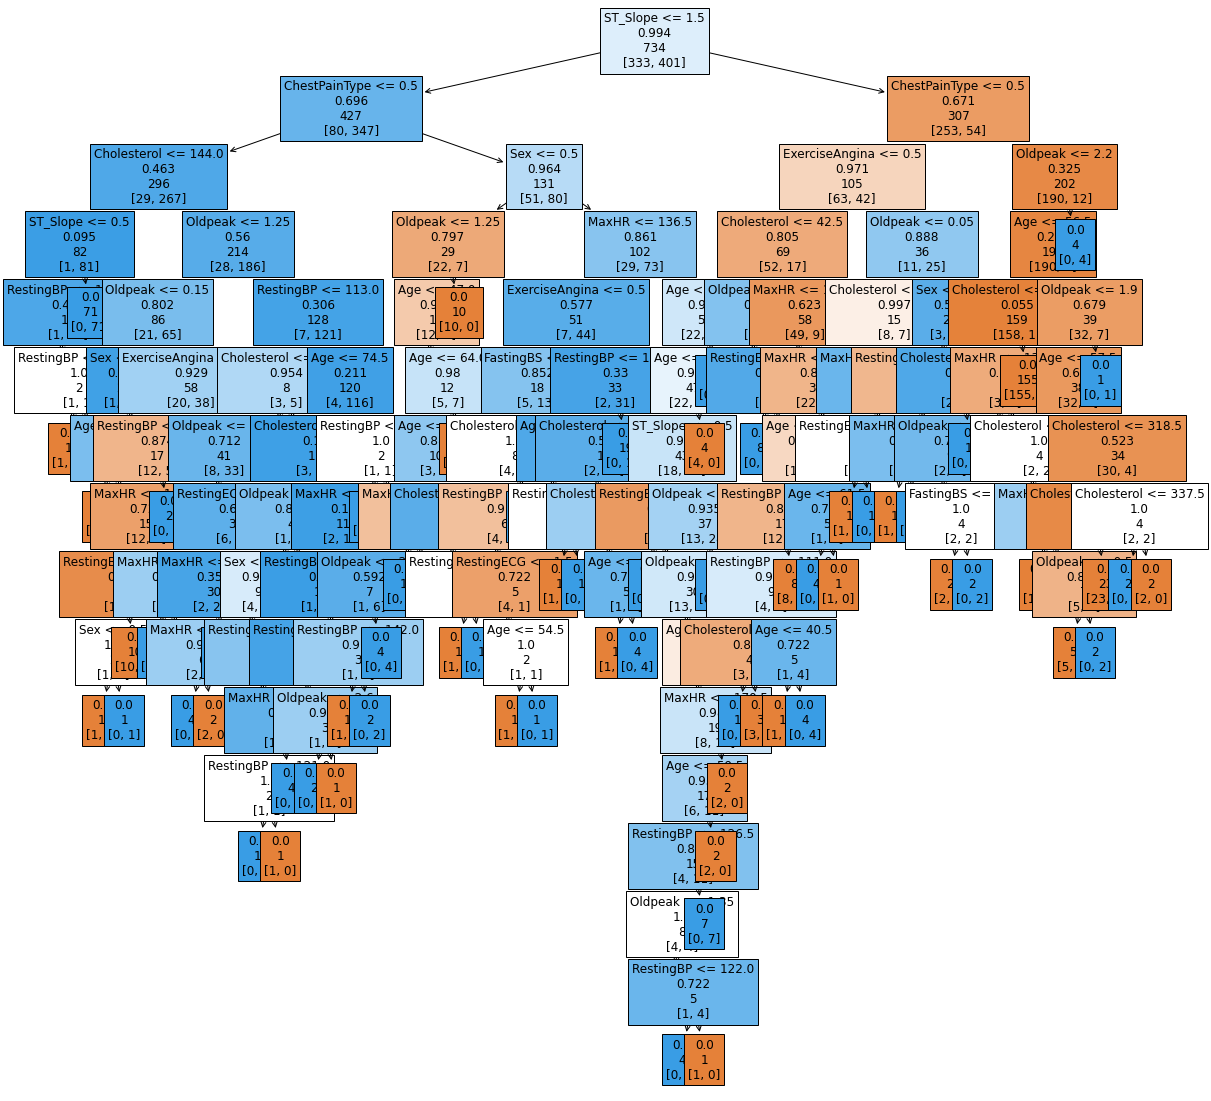

# Comparing both Classifiers
<hr>

Comparision of both the classifier is done with Confusion Metrix, Classification Report(precision, recall, f1-score, and support) and Prediction Accuracy moduals imported from the **sklearn.metrics**. Confusion Metrix is plotted with the sns heatmap.
<br>

<div class="alert alert-block alert-info">
<b>Note that: </b> Here y_pred is predictions we got fro the KNN model and y_pred_d is predictions we got from the Decision Tree model.
</div>

## Confusion Metrices

<AxesSubplot:title={'center':'KNN Model Confusion Metrix'}>

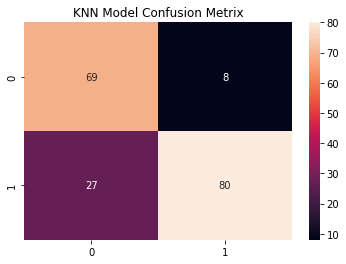

<AxesSubplot:title={'center':'Decision Tree Confusion Metrix'}>

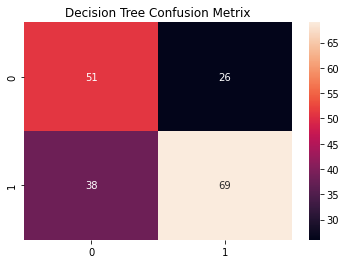

## Classification Reports

              precision    recall  f1-score   support

           0       0.72      0.90      0.80        77
           1       0.91      0.75      0.82       107

    accuracy                           0.81       184
   macro avg       0.81      0.82      0.81       184
weighted avg       0.83      0.81      0.81       184



              precision    recall  f1-score   support

           0       0.57      0.66      0.61        77
           1       0.73      0.64      0.68       107

    accuracy                           0.65       184
   macro avg       0.65      0.65      0.65       184
weighted avg       0.66      0.65      0.65       184



## Accuracy Scores

In [ ]:
# KNN Model



0.6521739130434783


In [ ]:
# Dicision Tree Model



0.8097826086956522
